# Census Income Project


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\SHIVAM PAL\OneDrive\Documents\Census.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


From above we see that there are total of 32560 rows and 15 columns from which Income will be our target column. And as we know that we have to predict if a person earns more than 50k or not , so it will be a classification problem with only two outcomes.

# EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above we see that there are no null values present in any of the column and the dataset is a mixture of object datatype and integer datatype, so after checking for duplicate values we will seperate the columns using list function for our ease.

In [4]:
df.duplicated().sum()


24

In [5]:
df=df.drop_duplicates()


As we had 24 duplicated values we have dropped them



In [6]:
int_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        int_cols.append(i)
    
obj_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_cols.append(i)

print('Integer columns are=',int_cols,'\n')
print('Object columns are=',obj_cols)

Integer columns are= ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'] 

Object columns are= ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [7]:
df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the above details we can notice the following-

Range,Mean and Standard deviation of each column
There maybe some outliers present as 75 % values and max vaues have huge gaps
Skewness present in some columns as mean and median (50%) values are different for some columns.

In [8]:
df.describe(include='object')


,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


From above desribe function we are describing the data from all the object type columns and we notice the following-

Unique values in each columns
Most frequent value in each column. (mode)
Frequency of the most occuring value.

In [9]:
df.nunique()


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

From above we can see the number of unique values present in each column.



In [10]:
for i in obj_cols:
    print(("\033[1m"+i+"\033[0m"))
    print(df[i].value_counts())
    print("-"*30)


Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
------------------------------
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Ma

From above we see every unique value present in object columns. And we see that some of the columns have '?' value present. So we will replace it with the value 'unknown'.

In [11]:
df['Workclass'].replace({' ?':' Unknown'},inplace=True)
df['Occupation'].replace({' ?':' Unknown'},inplace=True)
df['Native_country'].replace({' ?':' Unknown'},inplace=True)

#  Data Visualisation

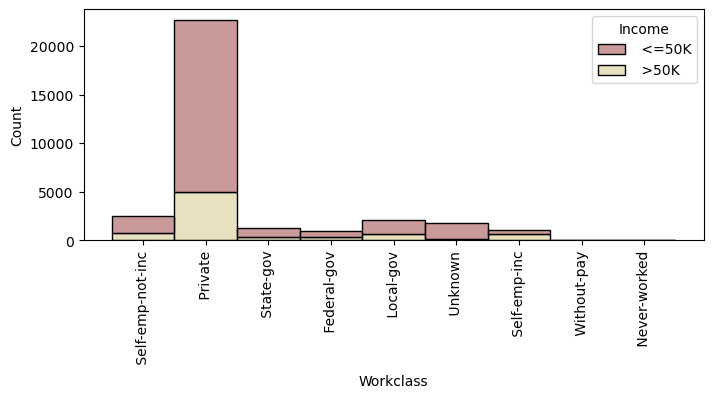

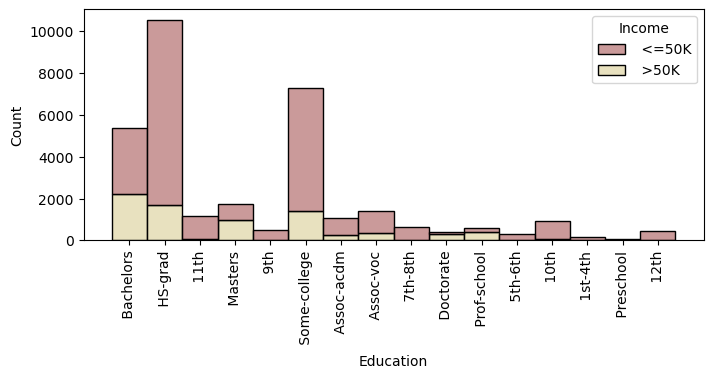

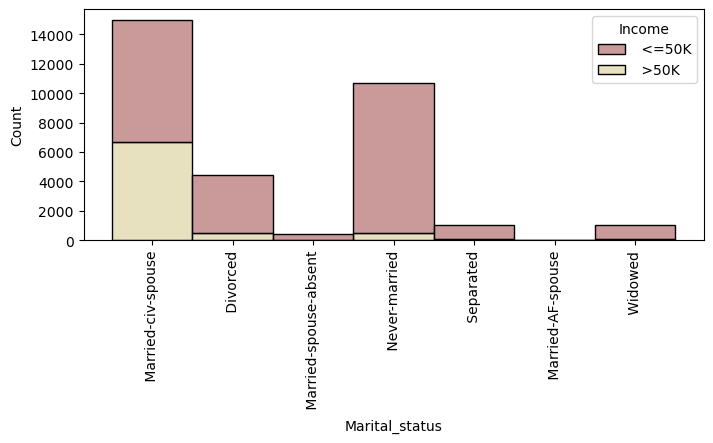

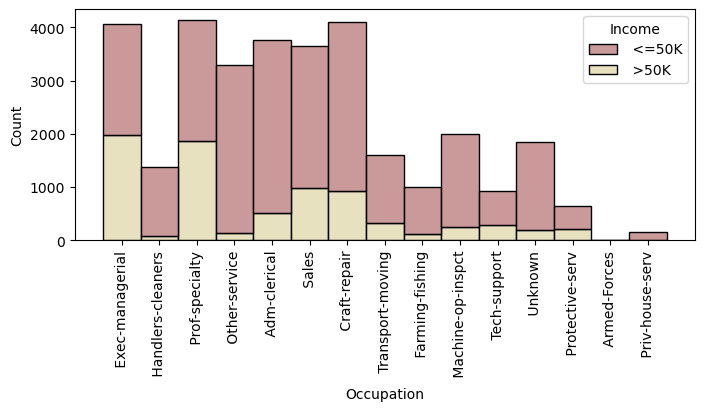

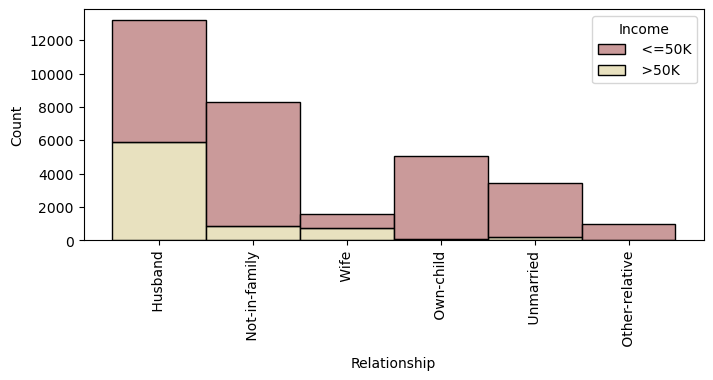

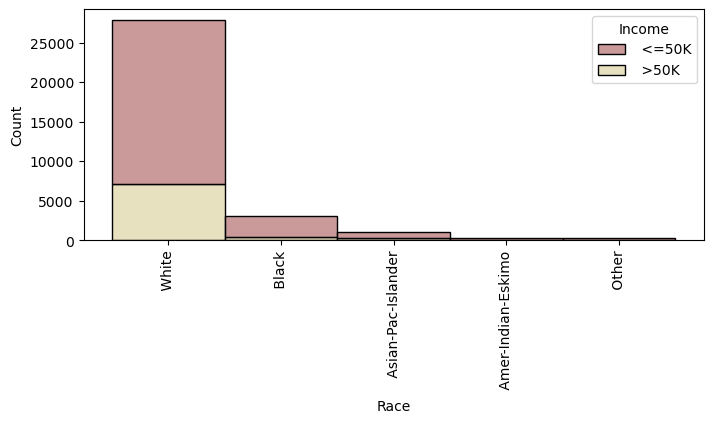

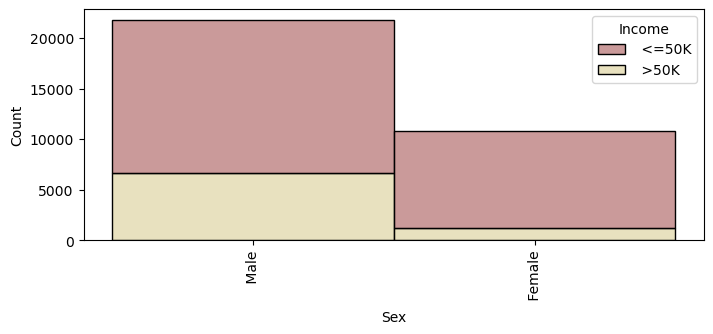

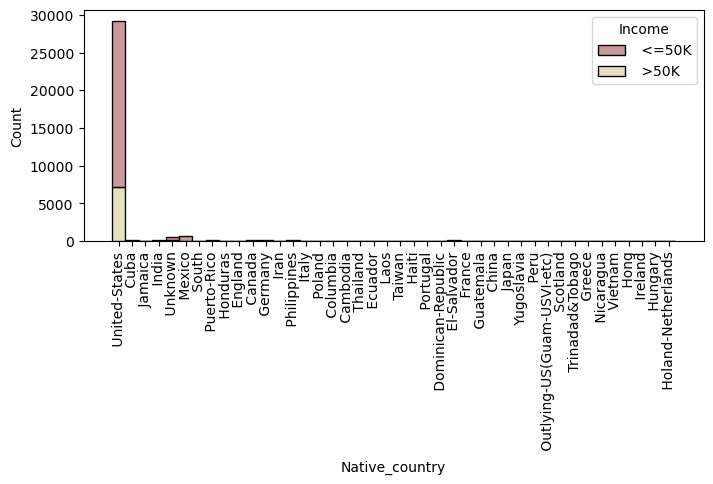

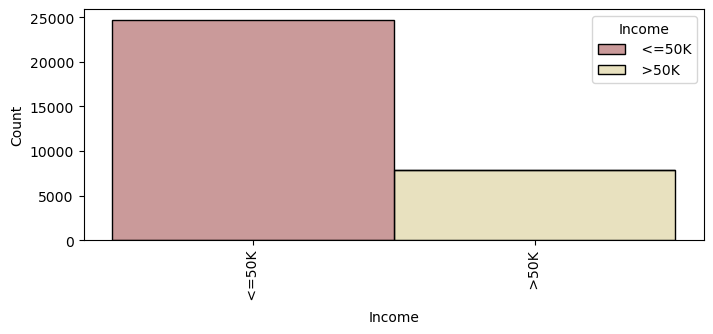

In [12]:
for i in obj_cols:
    pt.figure(figsize=(8,3))
    sb.histplot(x=df[i],palette='pink',multiple="stack",hue=df['Income'])
    pt.xticks(rotation=90)
    pt.show()

We have plotted count plots for each category column with income as hue which shows how each column is distributed with two possibilities of income.

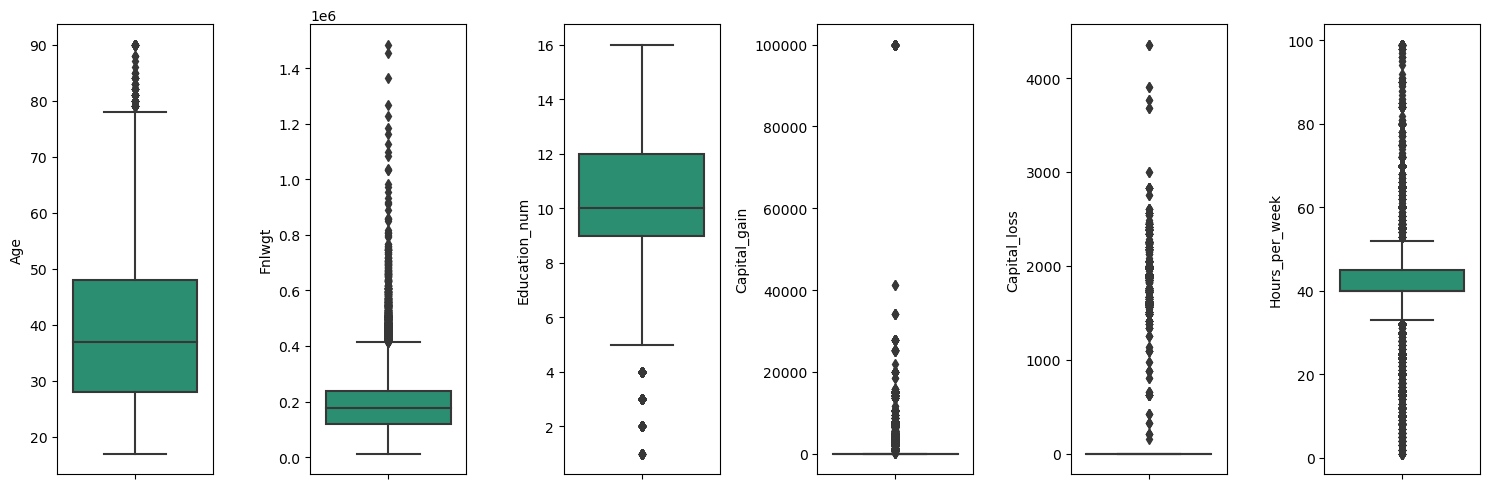

In [13]:
fig, ax = pt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
for col, value in df[int_cols].items():
    sb.boxplot(y=col, data=df, ax=ax[index], palette="Dark2")
    index += 1
pt.tight_layout()
pt.show()

From above boxplot we can see that there are outliers present in the data whill we will remove in later stages.



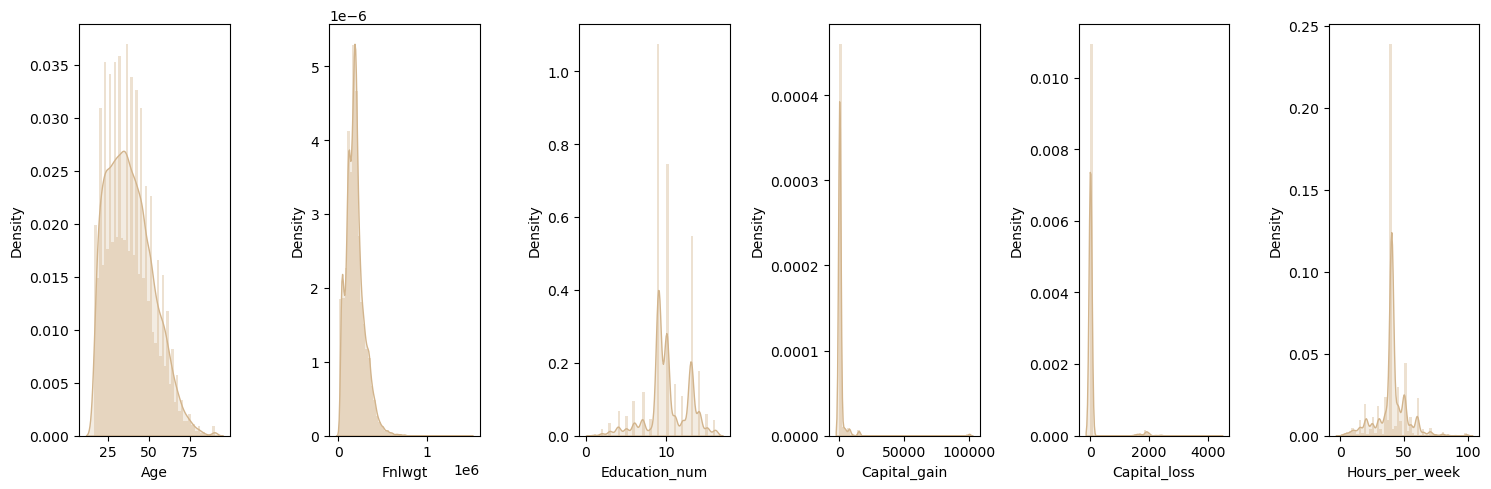

In [14]:
fig, ax = pt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[int_cols].items():
    sb.distplot(value, ax=ax[index],  color="tan", kde_kws={"shade": True})
    index += 1
pt.tight_layout()
pt.show()

From above histograms we see that the data is not normally distrubuted and hence skewed , so we will remove the skewness in later stages



In [15]:
print(int_cols)
print(obj_cols)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


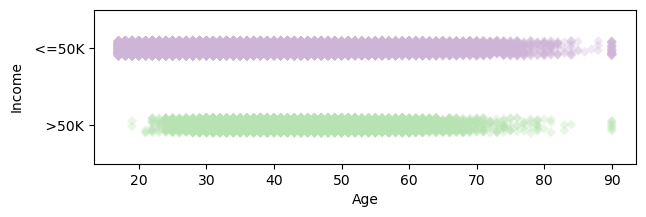

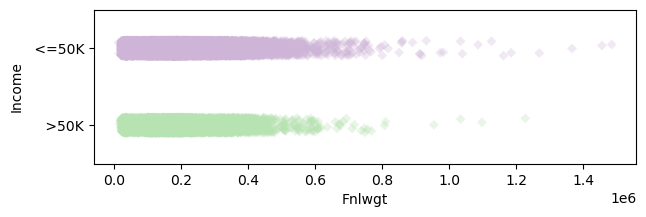

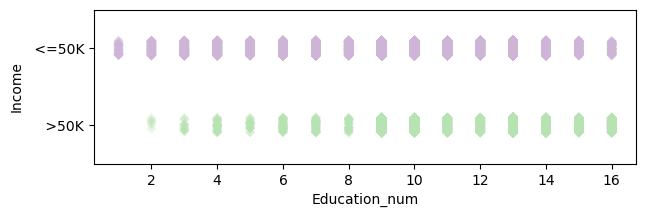

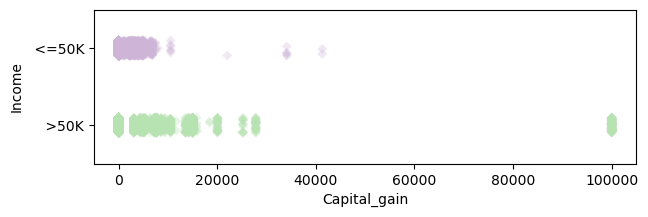

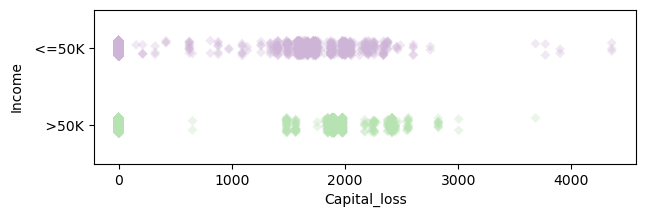

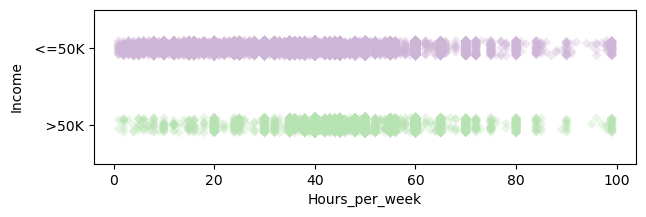

In [16]:
for i in int_cols:
    pt.figure(figsize=(7,2))
    sb.stripplot(y=df['Income'],x=df[i],palette='PRGn',marker='D',alpha=.3)
    pt.show()

From above graphs we have plotted relationships between different integer columns with the Income column.



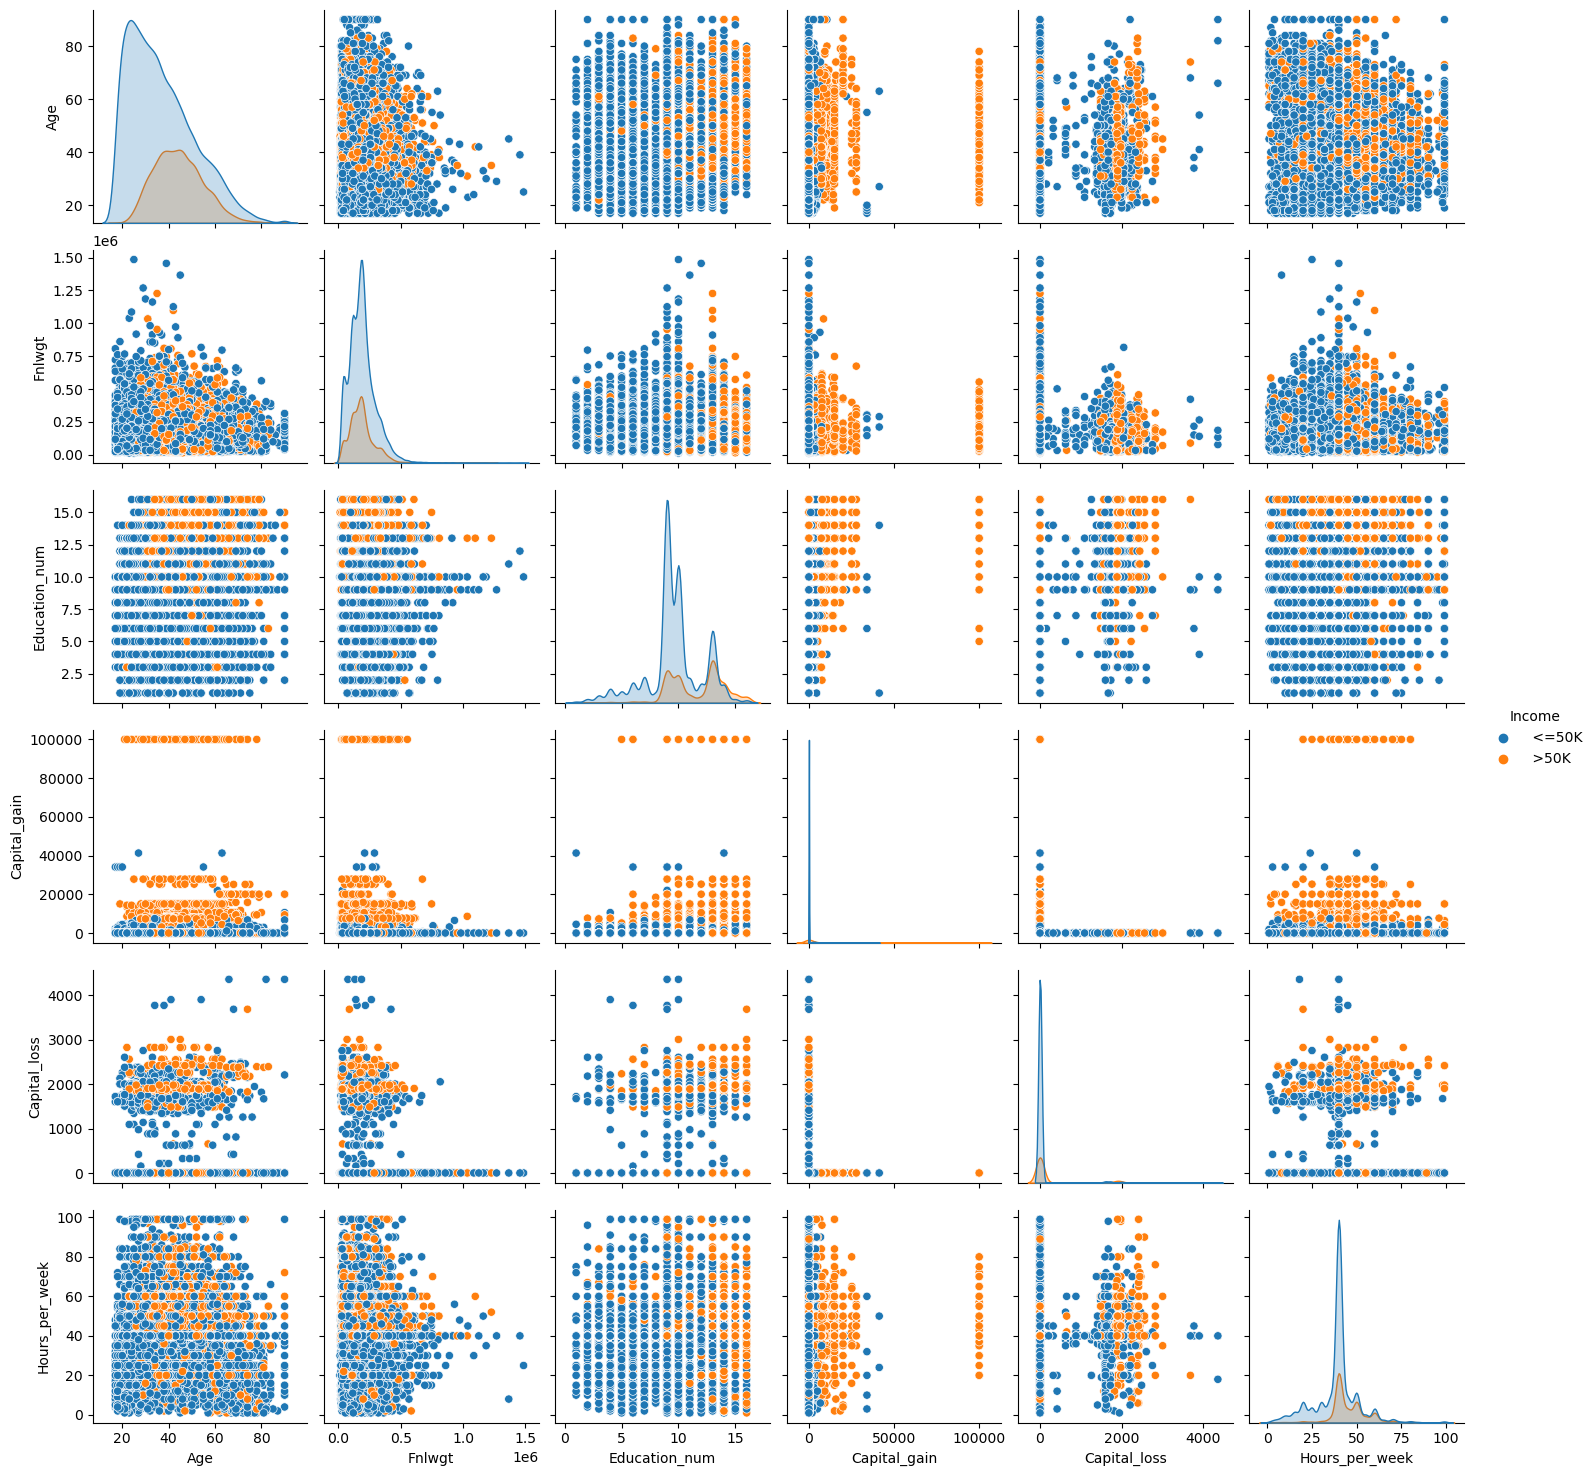

In [17]:
sb.pairplot(data=df,hue='Income')


<AxesSubplot:>

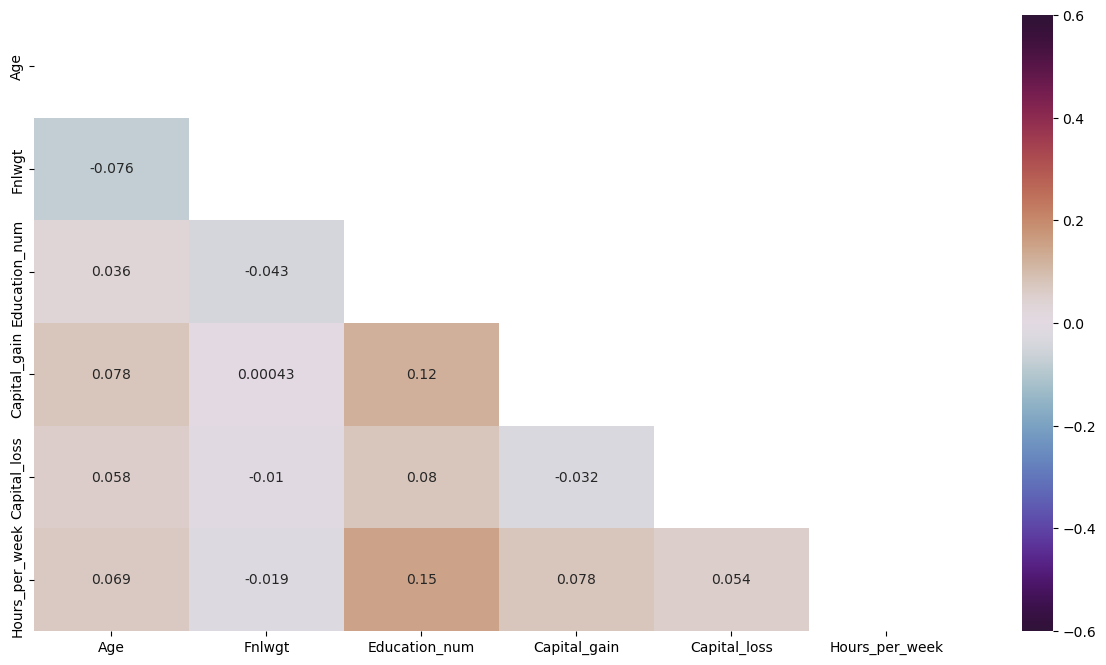

In [18]:
pt.figure(figsize=(15,8))
sb.heatmap(df.corr(),mask=np.triu(df.corr()),cmap='twilight_shifted',vmin=-.6,vmax=.6,annot=True)

We can see how the variables are correlated with each other with this heatmap. The strength of the correlation increases as the value moves away from 0 toward -1 or 1.



# Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [20]:
le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])

oe = OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0


# Outlier removal using zscore


In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27751, 15)
Percentage of data loss post outlier removal:  14.706786328989427


the dataloss is 15.7% which is higher than the accepted range (10%), but since the dataset still has many relevant data(27751 rows and 15 columns left ), we can afford to have this much of dataloss.



# Removing skewness 


# using log

In [22]:
df.skew()


Age                0.557657
Workclass          0.719459
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.126523
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.240019
Income             1.211640
dtype: float64

In [23]:
for col in int_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [24]:
df.skew()


Age              -0.113859
Workclass         0.719459
Fnlwgt           -0.842301
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.126523
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.095326
Capital_loss      4.305624
Hours_per_week    0.228752
Native_country   -4.240019
Income            1.211640
dtype: float64

From above we can see that skewness has pretty much decreased now



# Splitting the database into two variables


In [25]:
x=df.drop('Income',axis=1)
y=df['Income']

# Standard Scaling


In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.895349,1.176073,-1.036188,-0.335272,1.134817,-0.405890,-0.790625,-0.900122,0.393692,0.703036,-0.299337,-0.221164,-2.222450,0.257441
1,0.128813,-0.224436,0.471830,0.181506,-0.420646,-1.733664,-0.328636,-0.277868,0.393692,0.703036,-0.299337,-0.221164,-0.035664,0.257441
2,1.058673,-0.224436,0.606227,-2.402383,-1.198377,-0.405890,-0.328636,-0.900122,-1.962450,0.703036,-0.299337,-0.221164,-0.035664,0.257441
3,-0.717734,-0.224436,1.186342,-0.335272,1.134817,-0.405890,0.595341,2.211146,-1.962450,-1.422403,-0.299337,-0.221164,-0.035664,-5.351918
4,0.054591,-0.224436,0.911657,0.439895,1.523683,-0.405890,-0.790625,2.211146,0.393692,-1.422403,-0.299337,-0.221164,-0.035664,0.257441


We have scaled the data



In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,Age,1.220868
1,Workclass,1.096204
2,Fnlwgt,1.010636
3,Education,1.159062
4,Education_num,1.219201
5,Marital_status,1.159777
6,Occupation,1.098675
7,Relationship,1.686667
8,Race,1.031768
9,Sex,1.559879


From above we see that there is no multicollinearity present as all the values are under 10.



# Balancing the data using SMOTE


In [29]:
y.value_counts()


0    24697
1     7839
Name: Income, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [31]:
y.value_counts()


0    24697
1    24697
Name: Income, dtype: int64

Data is balanced now



# Building models


In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]


# Finding the best random state


In [ ]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)